# Analyzing Ford GoBike System Data
### by (Nisreen ALassa)

## Introduction

The dataset provides details on trips taken with the Ford GoBike system, which operates across the San Francisco Bay Area. The goal of this analysis is to explore the factors that influence the duration of bike rides, including user demographics (age and gender) and the popularity of stations. By examining this relationship, we can understand whether certain user groups or stations tend to have longer trips, which can inform operational strategies and targeted marketing efforts.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

**Dataset Preview:**

The dataset contains 183,412 records and 16 columns. Key columns include the trip duration (duration_sec), the time the trip started (start_time), the station locations, and user demographics such as gender and birth year.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**Basic Statistics:**

To better understand the dataset, we will review some basic statistics about the duration_sec (ride duration), the member_age (derived from the member_birth_year), and other relevant columns.

In [4]:
# View summary statistics for the dataset
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

**Missing Data:**

Checking for missing values is essential before proceeding with any analysis.

In [5]:
# Check for missing data in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The result shows that some columns have missing values, such as the start and end station data (197 missing values) and user demographic information (8265 missing values for birth year and gender). Meanwhile, other columns like trip duration, user type, and bike ID are complete. It’s important to handle the missing data appropriately, either by dropping the rows or using imputation techniques to fill the missing values.

#### Data Cleaning:

The dataset, which contains over 175,000 rows, provides detailed information about bike rentals in the San Francisco Bay Area during 2019. The analysis will primarily focus on exploring trip duration (measured in seconds) and the factors that may influence it. Key features of interest include:

* Start Time: By examining the start time of each trip, we can identify patterns related to the time of day or day of the week, potentially revealing trends in trip duration.

* User Age: Age is calculated from the member's birth year, and we will investigate whether certain age groups are associated with longer or shorter bike rental durations.

* User Gender: We will explore how gender may impact trip duration, looking for any differences between male and female riders.

* User Type: By distinguishing between subscribers and customers, we aim to understand how trip duration might vary based on whether the user is a regular subscriber or a one-time customer.

Additional features such as station information (start and end stations) and bike ID will also be considered to see if there are any station-specific or bike-specific patterns in the trip duration. The goal is to uncover trends and insights that can inform operational decisions, such as optimal bike placement and user behavior understanding.

**Code Adjustments and Explanation**

1. Removing Missing Gender Values:

In [6]:
df_clean = df[df['member_gender'].notna()]

    This filters out any rows where the gender is missing.
2. Gender Distribution:

In [7]:
df_clean['member_gender'].value_counts()

member_gender
Male      130651
Female     40844
Other       3652
Name: count, dtype: int64

    This provides the distribution of gender across the dataset
3. Removing Missing Station IDs:

In [8]:
df_clean = df_clean[df_clean['start_station_id'].notna()]

    This removes any rows where the start station ID is missing.
4. Checking for Duplicates:

In [9]:
df_clean.duplicated().sum()

0

    Ensures there are no duplicate rows in the cleaned dataset.
5. Date and Time Conversion:

In [10]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

    This converts the start_time and end_time columns to datetime format.
6. Extracting Day of the Week and Hour from start_time:

In [11]:
df_clean['start_time_dayofweek'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

7. Transforming start_time_dayofweek to Ordinal:

In [12]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

    This assigns an ordinal categorical type to start_time_dayofweek for ordered analysis.
8. Calculating User Age:

In [13]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

    The member_age is computed by subtracting the birth year from 2019.

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

##### Conclusion
> With the data cleaned and features derived, we can now move forward with deeper analysis of the relationship between trip durations and various factors like day of the week, user age, gender, and user type. The goal is to uncover patterns and insights that may help explain the observed cycling behavior.

### What is the structure of your dataset? 

The dataset contains over 175,000 bike trips in the San Francisco Bay Area that took place in 2019. The key features of the dataset are:

> * **Trip Duration**: The duration of the bike ride in seconds (duration_sec).
> * **Time Information**: The start and end times for each bike trip (start_time, end_time).
> * **Station Information**: Details about the start and end stations, including their names and geographical coordinates (latitude/longitude).
> * **User Information**: Anonymized data about the users, such as gender (member_gender), birth year (member_birth_year), and user type (user_type).
> * **Bike Information**: Each trip includes a unique bike ID (bike_id).
> * **Additional Features**: Additional features like the hour of the day (start_time_hour) and the day of the week (start_time_dayofweek) derived from the start_time, and the user's age, which is calculated from the member_birth_year.


### What is/are the main feature(s) of interest in your dataset?

The primary feature of interest in the dataset is the trip duration (duration_sec). The analysis aims to investigate patterns, trends, and factors that influence the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Several features in the dataset will help explore the relationship with trip duration:
> * **Start Time** (start_time): This feature is essential because it allows us to extract the day of the week (start_time_dayofweek) and hour of the day (start_time_hour), which can influence how long bike rides typically last.
> * **Member Birth Year** (member_birth_year): This will be used to calculate the age of the members (member_age). By analyzing age, we can explore how different age groups correlate with varying trip durations.
> * **Member Gender** (member_gender): Gender may have an impact on the duration of bike rides, and we can explore whether males, females, and other gender identities exhibit different patterns in trip length.
> * **User Type** (user_type): Differentiating between subscribers and customers might reveal if long-term users tend to take longer or shorter trips than one-time users.


## Univariate Exploration

**1. Converting Duration to Minutes:**

   Convert the duration_sec column to minutes for easier understanding and analysis.

In [15]:
# Convert duration from seconds to minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

**2. Univariate Exploration:**

   Explore the distribution of trip duration (in minutes) using a histogram.

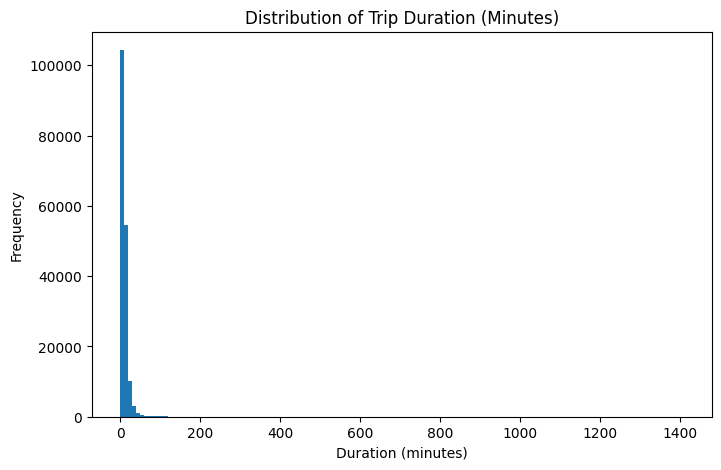

In [16]:
# Define bin size
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max() + binsize, binsize)

# Plot histogram
plt.figure(figsize=[8, 5])
plt.hist(df_clean['duration_min'], bins=bins, color=sb.color_palette()[0])
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

**3. Fixing the Distribution Using Log Scale:**

   Since the distribution has a long tail, apply a logarithmic scale to fix the distribution:

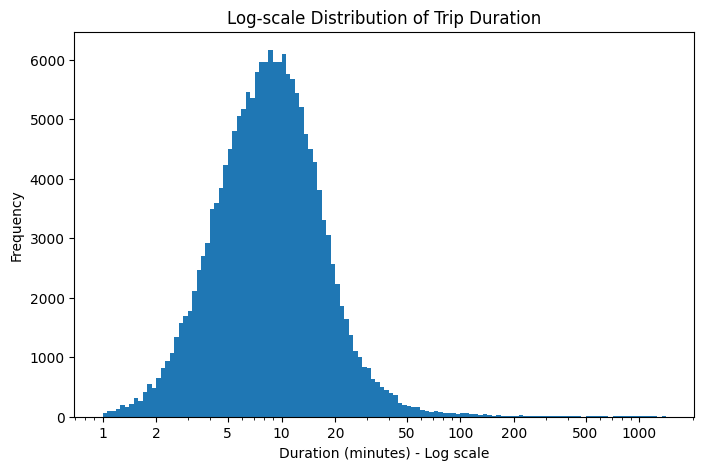

In [17]:
# Apply logarithmic scale
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(df_clean['duration_min'], bins=bins, color=sb.color_palette()[0])
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Duration (minutes) - Log scale')
plt.ylabel('Frequency')
plt.title('Log-scale Distribution of Trip Duration')
plt.show()

**4. Removing Extreme Values:**

   To avoid the effect of extreme values, remove trips that last longer than 100 minutes.

In [18]:
# Remove trips with duration greater than 100 minutes
df_clean = df_clean[df_clean['duration_min'] <= 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174249 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174249 non-null  int64         
 1   start_time               174249 non-null  datetime64[ns]
 2   end_time                 174249 non-null  datetime64[ns]
 3   start_station_id         174249 non-null  float64       
 4   start_station_name       174249 non-null  object        
 5   start_station_latitude   174249 non-null  float64       
 6   start_station_longitude  174249 non-null  float64       
 7   end_station_id           174249 non-null  float64       
 8   end_station_name         174249 non-null  object        
 9   end_station_latitude     174249 non-null  float64       
 10  end_station_longitude    174249 non-null  float64       
 11  bike_id                  174249 non-null  int64         
 12  user_type            

**5. Age Analysis:**

   Remove unrealistic age values (such as ages over 60 years old).

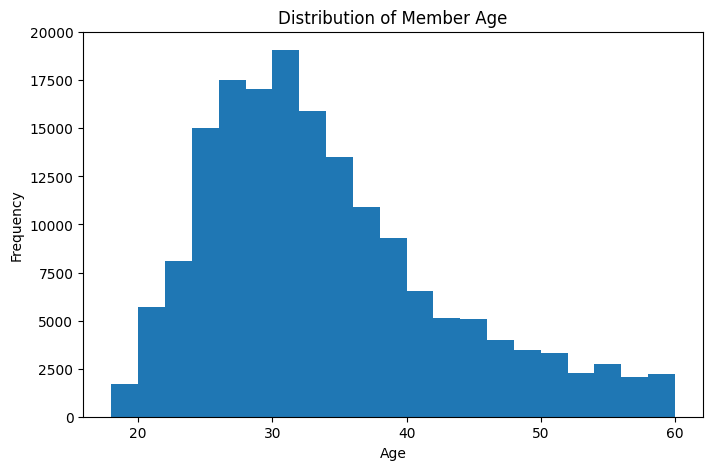

In [19]:
# Calculate age
df_clean['member_age'] = 2019 - df_clean['member_birth_year']
df_clean['member_age'] = df_clean['member_age'].astype(int)

# Calculate IQR for age
Q1_age = df_clean['member_age'].quantile(0.25)
Q3_age = df_clean['member_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_age_bound = Q3_age + 1.5 * IQR_age

# Remove ages above the upper bound
df_clean = df_clean[df_clean['member_age'] <= 60]

# Plot age distribution
binsize = 2
bins = np.arange(18, df_clean['member_age'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(df_clean['member_age'], bins=bins, color=sb.color_palette()[0])
plt.title('Distribution of Member Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**6. Gender Analysis:** 

   Analyze the distribution of gender among cyclists.

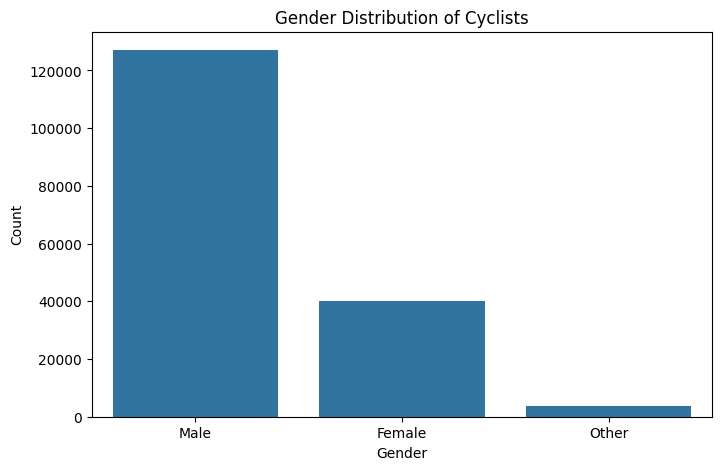

In [20]:
# Plot gender distribution
plt.figure(figsize=[8, 5])
sb.countplot(data=df_clean, x='member_gender', color=sb.color_palette()[0])
plt.title('Gender Distribution of Cyclists')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

> There are about three times as many male cyclists as female cyclists.

**7. Trip Start Time Analysis:**

   Analyze the start times of trips (by hour of the day and day of the week).

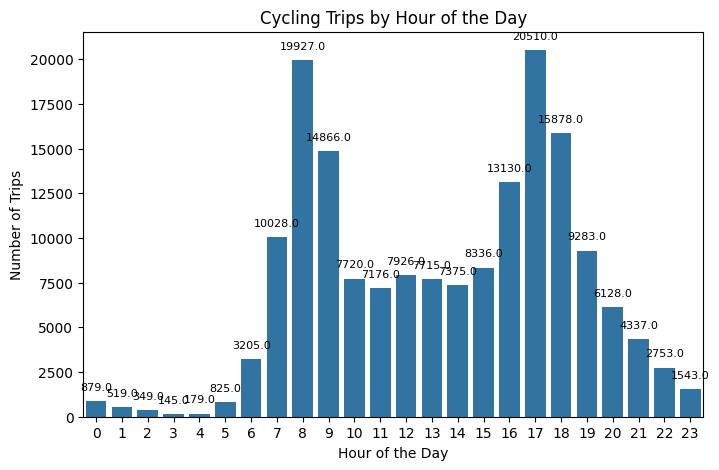

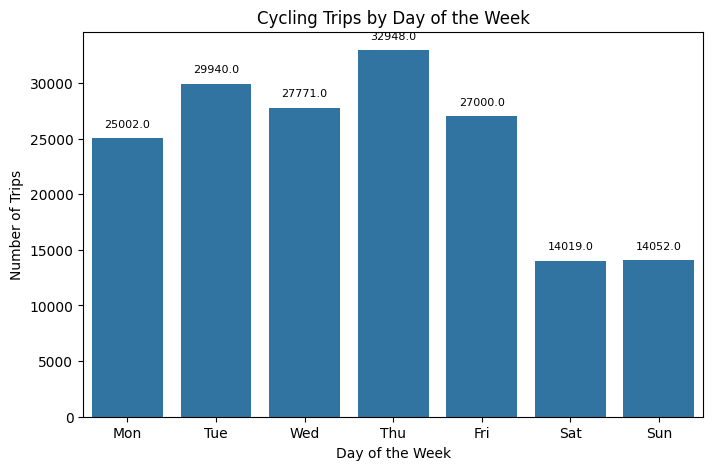

In [21]:
# Plot number of trips by hour with smaller values above the bars
plt.figure(figsize=[8, 5])
ax = sb.countplot(data=df_clean, x='start_time_hour', color=sb.color_palette()[0])
plt.title('Cycling Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')

# Annotate with the count above each bar with smaller font size
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.show()

# Plot number of trips by day of the week with smaller values above the bars
plt.figure(figsize=[8, 5])
ax = sb.countplot(data=df_clean, x='start_time_dayofweek', color=sb.color_palette()[0])
plt.title('Cycling Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')

# Annotate with the count above each bar with smaller font size
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.show()


> The day with the most cyclists is Tuesday, and 5:00 PM is the peak hour for the most cyclists.

**8. User Type Analysis:**

   Analyze the distribution of trips by user type (customer or subscriber).

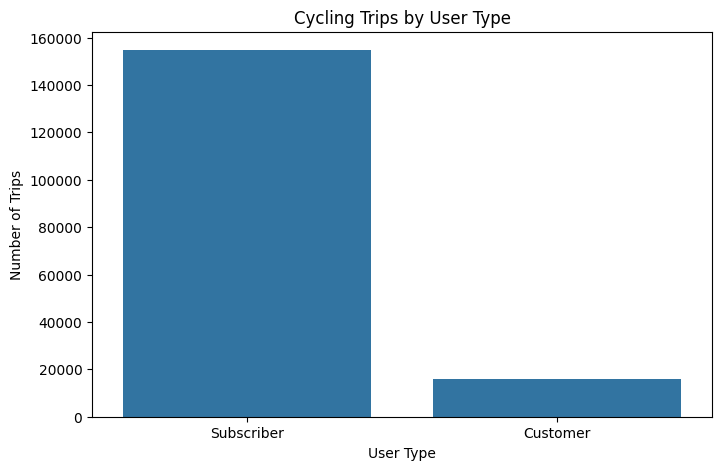

In [22]:
# Plot trips by user type
plt.figure(figsize=[8, 5])
sb.countplot(data=df_clean, x='user_type', color=sb.color_palette()[0])
plt.title('Cycling Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

**9. Trip Duration by User Type:**

    explore how trip durations vary between "Subscriber" and "Customer" user types to see if there's any notable difference in their usage patterns.

/tmp/ipykernel_13/2634396116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_clean, x='user_type', y='duration_min', palette='Set2')


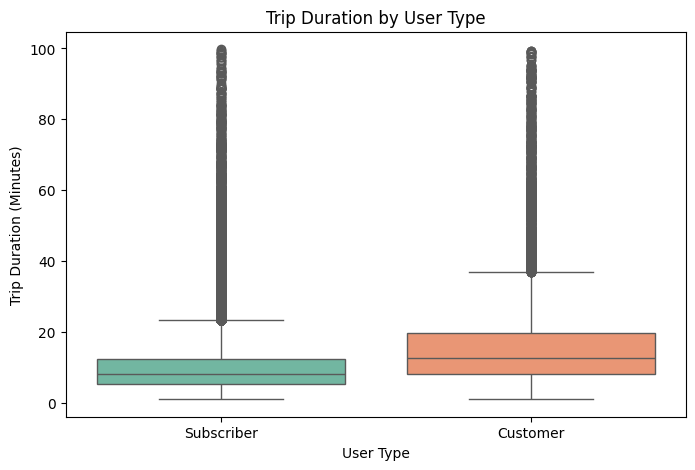

In [23]:
# Boxplot of duration by user type
plt.figure(figsize=[8, 5])
sb.boxplot(data=df_clean, x='user_type', y='duration_min', palette='Set2')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


**10. Relationship Between Member Age and Trip Duration:**

    Explore how the age of users affects the duration of their trips. We can use a scatter plot to visualize this relationship.

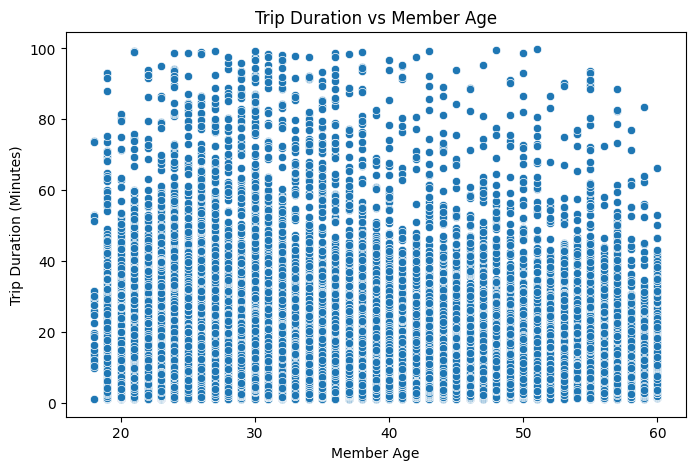

In [24]:
# Scatter plot of member age vs trip duration
plt.figure(figsize=[8, 5])
sb.scatterplot(data=df_clean, x='member_age', y='duration_min', color=sb.color_palette()[0])
plt.title('Trip Duration vs Member Age')
plt.xlabel('Member Age')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


**11. Hour of the Day vs Trip Duration:**

    analyze how the time of day affects the trip duration. This could help in identifying whether peak hours correspond to longer or shorter trips.

/tmp/ipykernel_13/2116181238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_clean, x='start_time_hour', y='duration_min', palette='Blues')


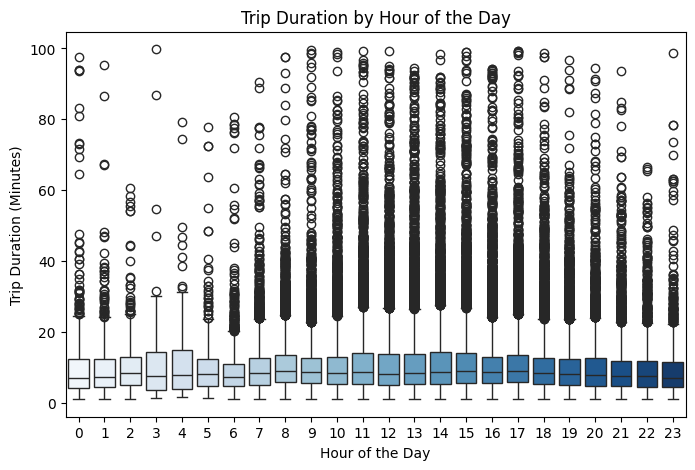

In [25]:
# Plot of trip duration by hour of the day
plt.figure(figsize=[8, 5])
sb.boxplot(data=df_clean, x='start_time_hour', y='duration_min', palette='Blues')
plt.title('Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


**12. Investigating the Distribution of Trips Across Days of the Week:**

    analyze the number of trips taken on each day of the week and correlate it with the trip duration to see if the day influences the trip length.

/tmp/ipykernel_13/3150912653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df_clean, x='start_time_dayofweek', palette='coolwarm')


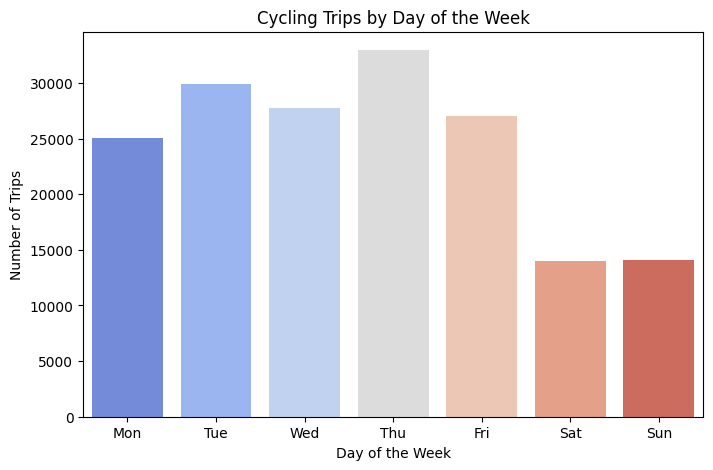

/tmp/ipykernel_13/3150912653.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_clean, x='start_time_dayofweek', y='duration_min', palette='Set3')


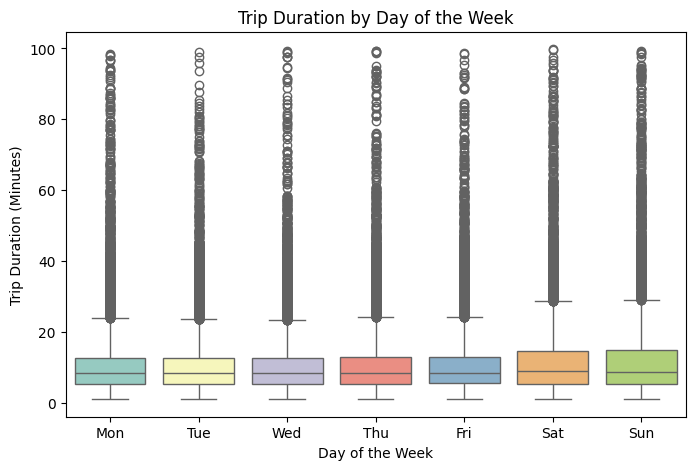

In [26]:
# Plot of trip count by day of the week
plt.figure(figsize=[8, 5])
sb.countplot(data=df_clean, x='start_time_dayofweek', palette='coolwarm')
plt.title('Cycling Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

# Boxplot of trip duration by day of the week
plt.figure(figsize=[8, 5])
sb.boxplot(data=df_clean, x='start_time_dayofweek', y='duration_min', palette='Set3')
plt.title('Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


**13. Investigating the Impact of Gender on Trip Duration:**

explore if there’s any significant difference in trip durations between male, female, and other gender categories.

/tmp/ipykernel_13/1159238535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_clean, x='member_gender', y='duration_min', palette='Pastel1')


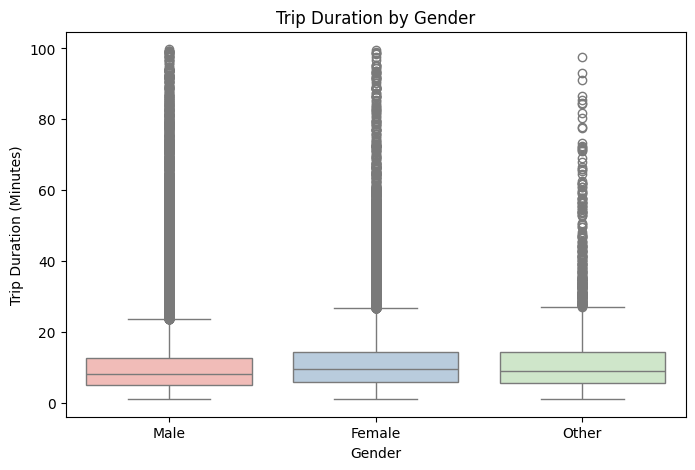

In [27]:
# Boxplot of duration by gender
plt.figure(figsize=[8, 5])
sb.boxplot(data=df_clean, x='member_gender', y='duration_min', palette='Pastel1')
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


**14. User Type vs Age:**

    explore the relationship between user type and age to see whether there are more subscribers or customers within certain age groups.

/tmp/ipykernel_13/1565116069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=df_clean, x='user_type', y='member_age', palette='viridis')


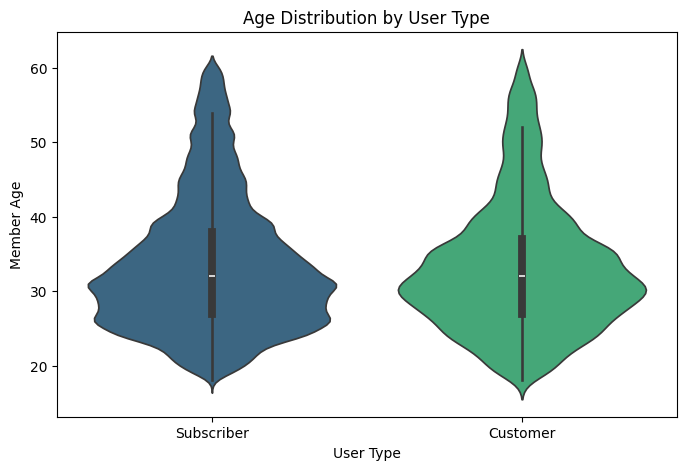

In [28]:
# Plot of user type distribution by age
plt.figure(figsize=[8, 5])
sb.violinplot(data=df_clean, x='user_type', y='member_age', palette='viridis')
plt.title('Age Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Member Age')
plt.show()


**15. Exploring the Start Station vs Trip Duration:**

    whether trips starting at certain stations tend to have longer or shorter durations. This could help identify any patterns related to the station locations.

/tmp/ipykernel_13/1182675307.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_top_stations, x='start_station_name', y='duration_min', palette='coolwarm', showfliers=False)


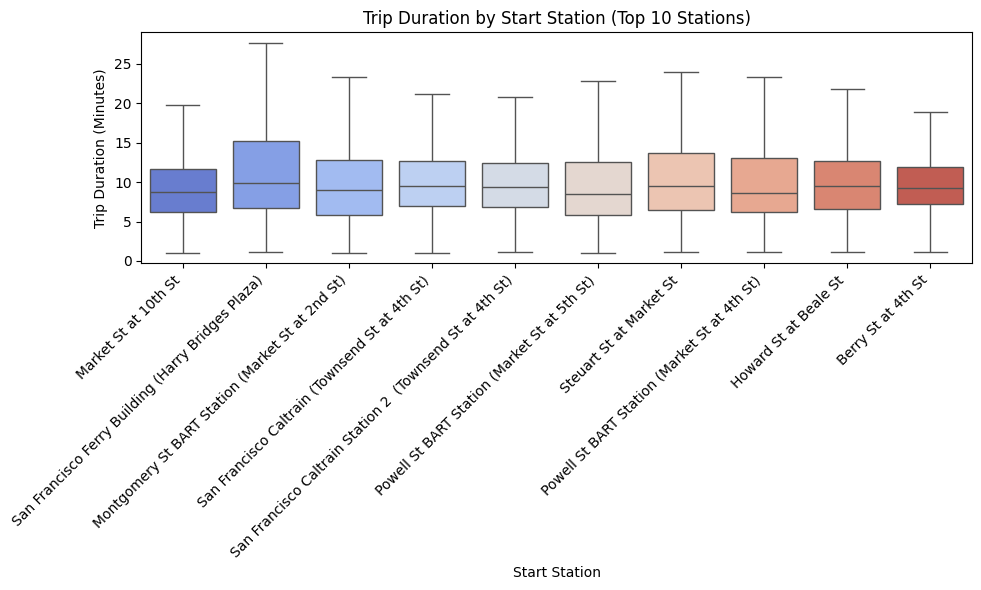

In [29]:
# Get the top 10 stations by the number of trips
top_stations = df_clean['start_station_name'].value_counts().head(10).index

# Filter data to include only top 10 stations
df_top_stations = df_clean[df_clean['start_station_name'].isin(top_stations)]

# Boxplot of trip duration by start station (top 10 stations)
plt.figure(figsize=[10, 6])
sb.boxplot(data=df_top_stations, x='start_station_name', y='duration_min', palette='coolwarm', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Trip Duration by Start Station (Top 10 Stations)')
plt.xlabel('Start Station')
plt.ylabel('Trip Duration (Minutes)')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()



> The longer trip durations from "San Francisco Ferry Building (Harry Bridges Plaza)" station are likely due to its central location, heavy traffic, and being a hub for tourists and commuters. Trips from this station may involve longer distances, more stops, or scenic routes. Further analysis of user types, times of day, and comparisons with other stations can provide additional insights.

**16. Investigating the Impact of Trip Sharing on Duration:**

    Explore whether trips marked as "bike share for all trip" have different durations than those not marked.

/tmp/ipykernel_13/1748677176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_clean, x='bike_share_for_all_trip', y='duration_min', palette='Set1')


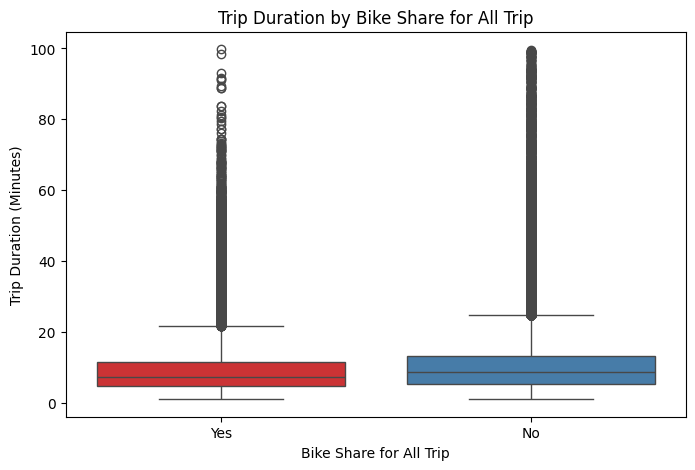

In [30]:
# Boxplot of duration by bike share for all trip
plt.figure(figsize=[8, 5])
sb.boxplot(data=df_clean, x='bike_share_for_all_trip', y='duration_min', palette='Set1')
plt.title('Trip Duration by Bike Share for All Trip')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Trip Duration (Minutes)')
plt.show()


**17. Saving Cleaned Data:**

    After cleaning the data, save the cleaned version of the dataset.

In [31]:
# Save cleaned data
df_clean.to_csv('cleaned_bike_trips.csv', index=False)

# Bivariate Exploration


In [32]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 
                    'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 
                    'bike_id', 'member_birth_year', 'member_age', 'duration_min']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_time_dayofweek', 'start_time_hour', 'member_gender', 'user_type']


**1. Correlation plot to investigate pairwise relationships between numeric variables**

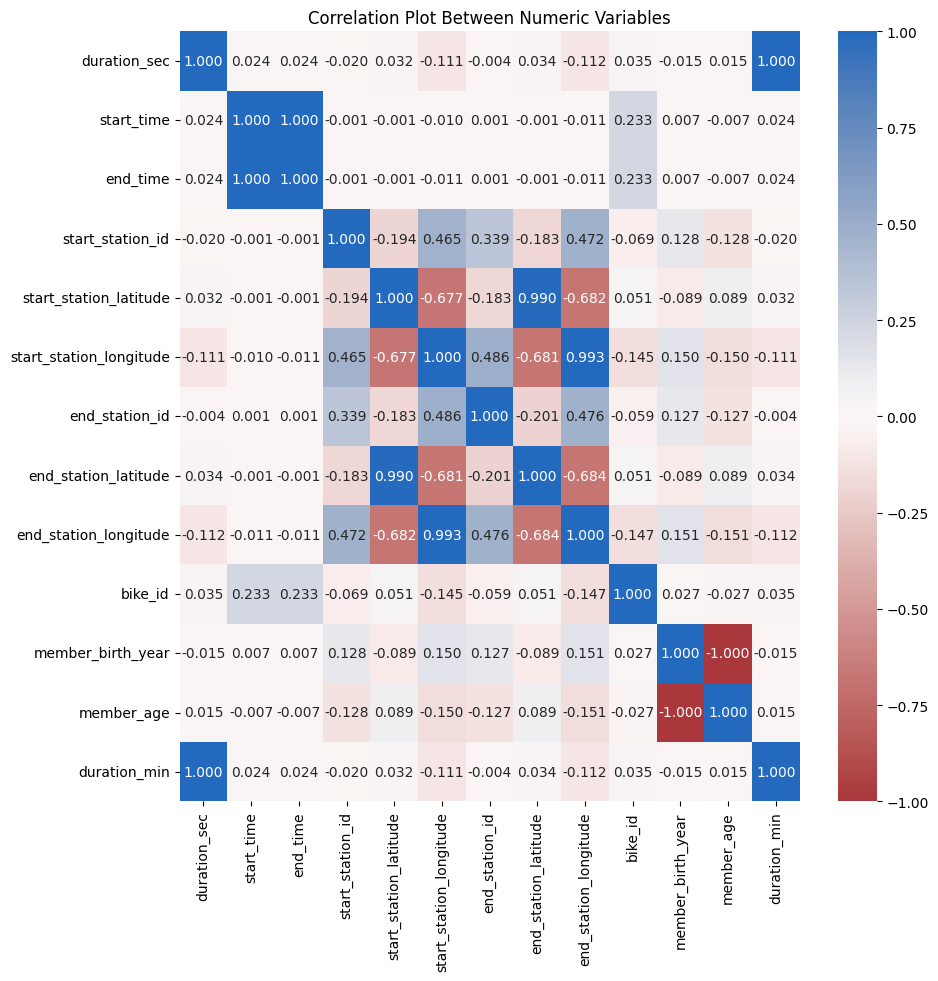

In [33]:
plt.figure(figsize = [10, 10])
sb.heatmap(df_clean[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);
plt.title('Correlation Plot Between Numeric Variables')
plt.show()

**Observations:**
> * start_station_id and end_station_id: Strong correlation, likely trips between the same stations.
> * start_station_latitude and start_station_longitude, end_station_latitude and end_station_longitude: Strong spatial correlation.

**2. Scatter plot of Duration vs. Member Age**

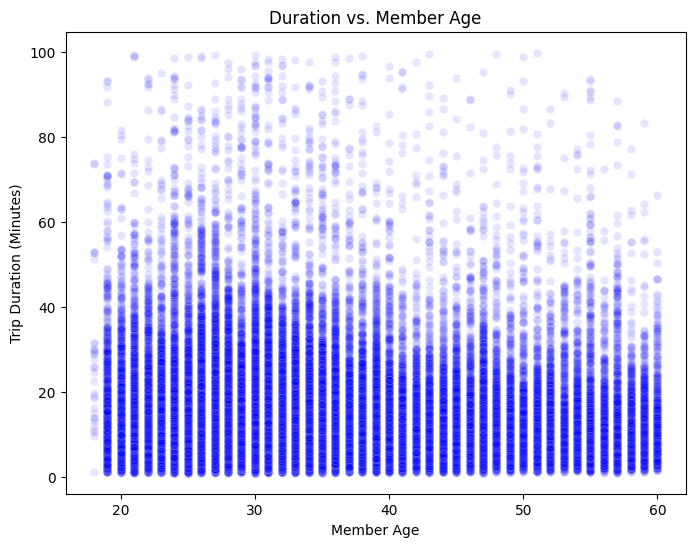

In [34]:
plt.figure(figsize=[8, 6])
sb.scatterplot(data=df_clean, x='member_age', y='duration_min', alpha=0.1, color='blue')
plt.title('Duration vs. Member Age')
plt.xlabel('Member Age')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

**Insights:**
> * No clear linear relationship between age and duration, but there is a concentration around age 30 and duration 10 minutes.

**3. Boxplot by Day of the Week and Hour of the Day**

/tmp/ipykernel_13/648393178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df_clean, x='start_time_dayofweek', y='duration_min', palette='coolwarm', showfliers=False)


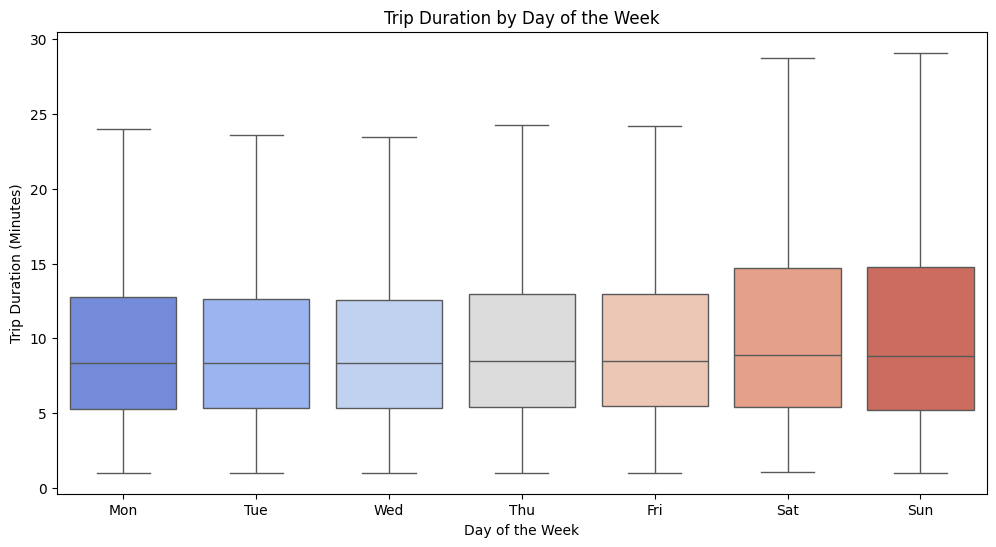

In [35]:
plt.figure(figsize=[12, 6])
sb.boxplot(data=df_clean, x='start_time_dayofweek', y='duration_min', palette='coolwarm', showfliers=False)
plt.title('Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

**Insights:**
> * Bike rides on Saturday and Sunday tend to have longer durations compared to other weekdays.

**4. Violin plots for Duration (Log Transformed) and Member Age by Categorical Features Log transformation of the duration for better visualization**

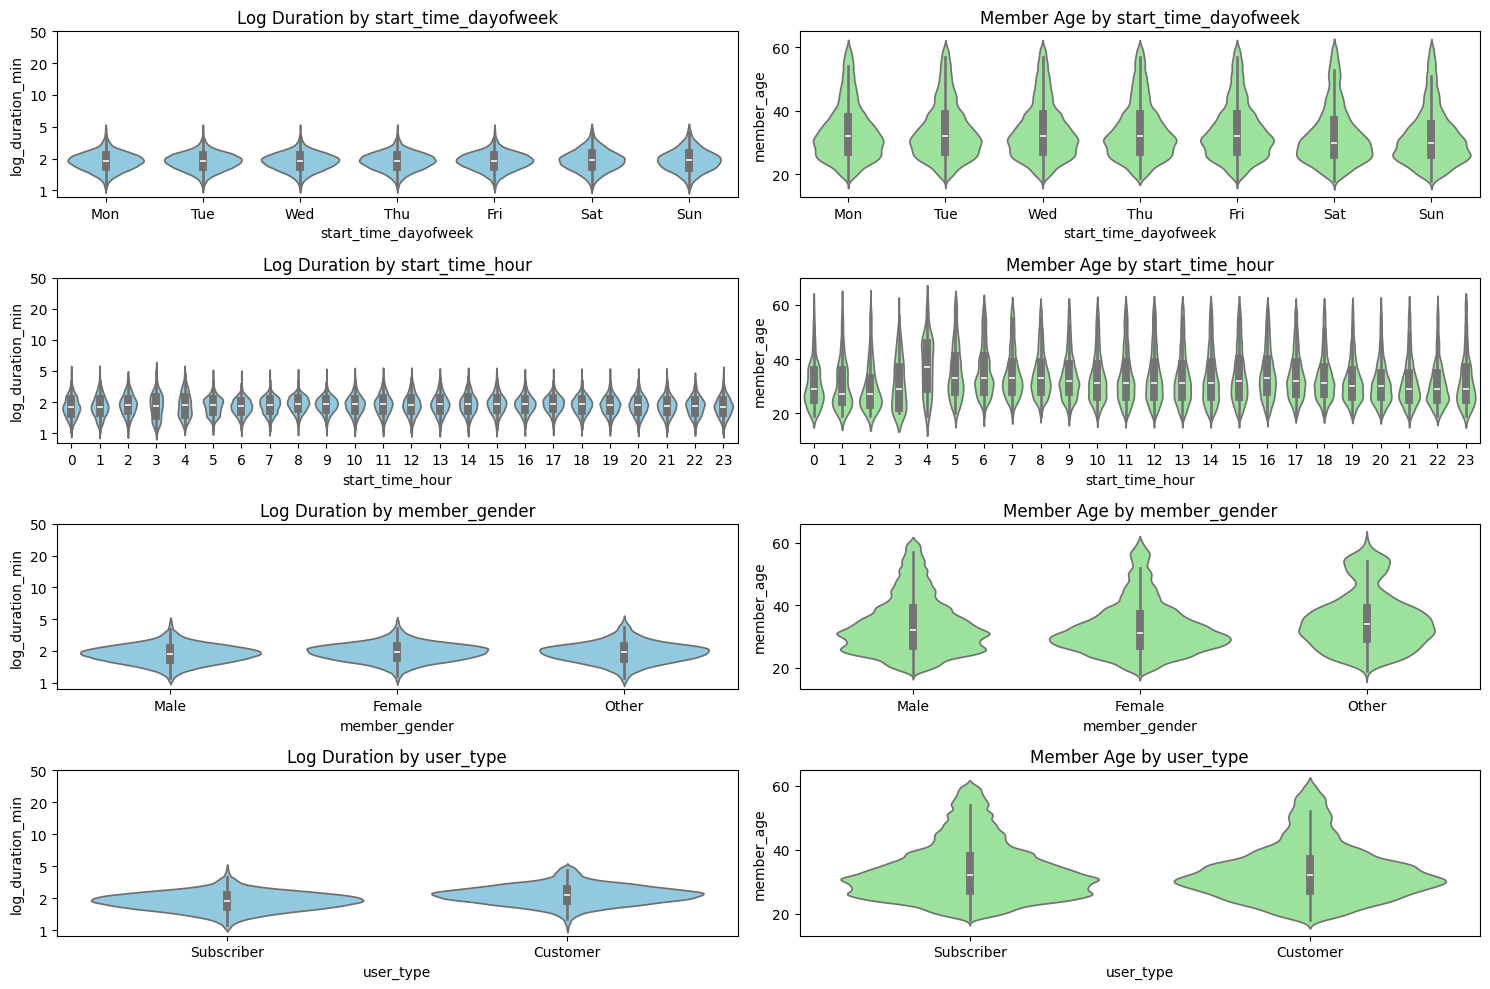

In [36]:
df_clean['log_duration_min'] = df_clean['duration_min'].apply(lambda x: np.log10(x))

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=[15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    # Violin plot for log-transformed duration
    sb.violinplot(data=df_clean, x=var, y='log_duration_min', ax=ax[i, 0], color='skyblue')
    ax[i, 0].set_yticks([0, 1, 2, 3, 4, 5])
    ax[i, 0].set_yticklabels([1, 2, 5, 10, 20, 50])
    ax[i, 0].set_title(f'Log Duration by {var}')
    
    # Violin plot for member age
    sb.violinplot(data=df_clean, x=var, y='member_age', ax=ax[i, 1], color='lightgreen')
    ax[i, 1].set_title(f'Member Age by {var}')

plt.tight_layout()
plt.show()

**Insights:**
>* Duration is more evenly distributed after the log transformation. Non-subscribers tend to have a wider range of durations.
>* The average member age varies by day of the week and hour of the day.
>* On average, females tend to ride longer and customer-type cyclists ride longer than subscribers.
>* The shapes of the violins in the plots on the left side (with 'log_duration_min' as y-axis) are more even compared to the shapes of the violins in the plots on the right side (with member_age as y-axis). The transformation make the violins on the left side looks more even.
>* Look at the plot on 1st row, 1st column: there are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
>* Look at the plot on 3rd row, 1st column: the mean bike duration for female cyclists is longer than the the mean duration of the male cyclists.
>*Look at the plot on 3rd row, 1st column: the mean bike duration for female cyclists is longer than the the mean duration of the male cyclists.
>* Look at the plot on 4th row, 1st column: the mean bike duration for customer type cyclists is longer than the the mean duration of the subscriber type cyclists.

**5. Countplot of Number of Trips by Hour of the Day, Separated by Gender**


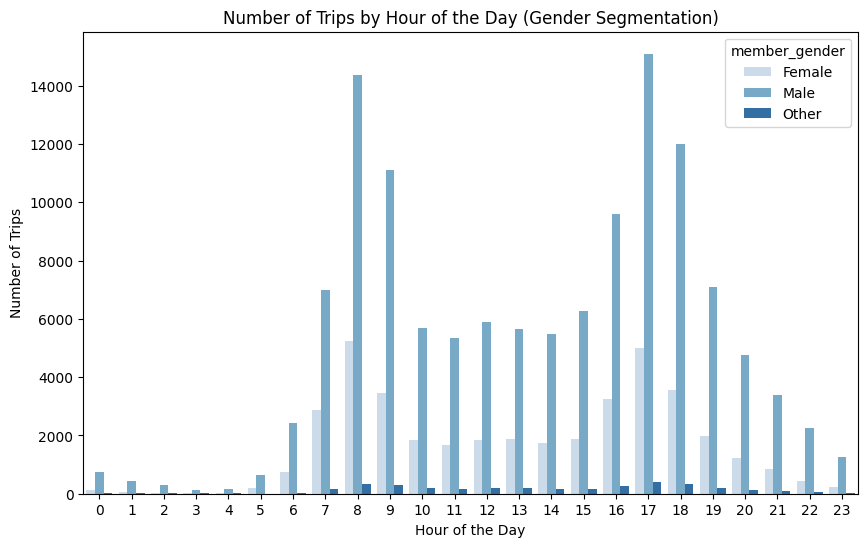

In [37]:
plt.figure(figsize=[10, 6])
sb.countplot(data=df_clean, x='start_time_hour', hue='member_gender', palette='Blues')
plt.title('Number of Trips by Hour of the Day (Gender Segmentation)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

**Insights:**
> * There is a peak in cycling activity at 5:00 PM for both male and female cyclists.
> * Female cyclists have a higher count at 8:00 AM compared to other hours.

**6. Countplot of Number of Trips by Hour of the Day, Separated by User Type**

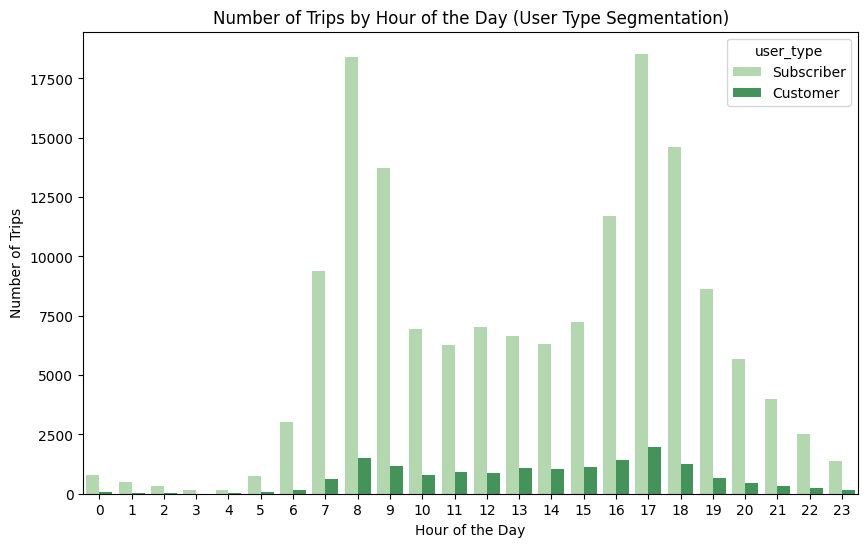

In [38]:
plt.figure(figsize=[10, 6])
sb.countplot(data=df_clean, x='start_time_hour', hue='user_type', palette='Greens')
plt.title('Number of Trips by Hour of the Day (User Type Segmentation)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

**Insights:**
> * Subscriber cyclists tend to have higher activity in the morning (around 8:00 AM) and late afternoon (around 5:00 PM).
> * Customer-type cyclists have more activity at 5:00 PM, similar to the subscriber pattern.

**Scatter plot of Log Duration vs. Member Age Log transform duration for better scale representation**

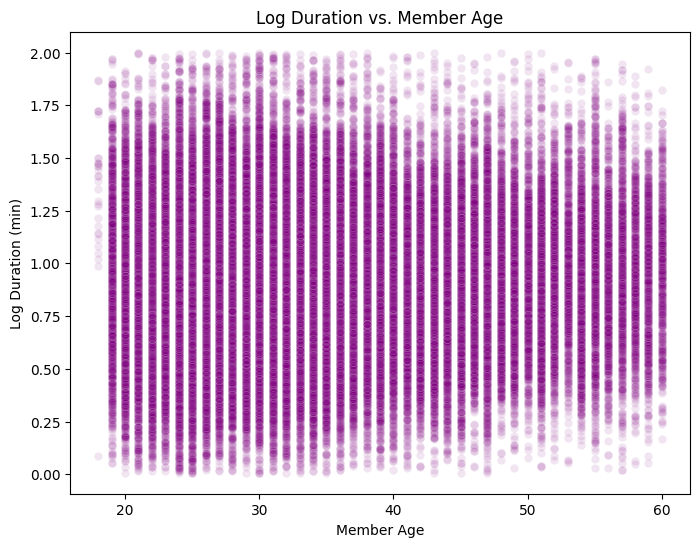

In [40]:
plt.figure(figsize=[8, 6])
sb.scatterplot(data=df_clean, x='member_age', y='log_duration_min', alpha=0.1, color='purple')
plt.title('Log Duration vs. Member Age')
plt.xlabel('Member Age')
plt.ylabel('Log Duration (min)')
plt.show()

**Insights:**
> * There is no obvious linear relationship, but the data appears more evenly distributed after the log transformation.

**8. PairGrid for Duration and Age by Categorical Features Plot using pairwise relationships for categorical variables with log duration**

<Figure size 1500x1500 with 0 Axes>

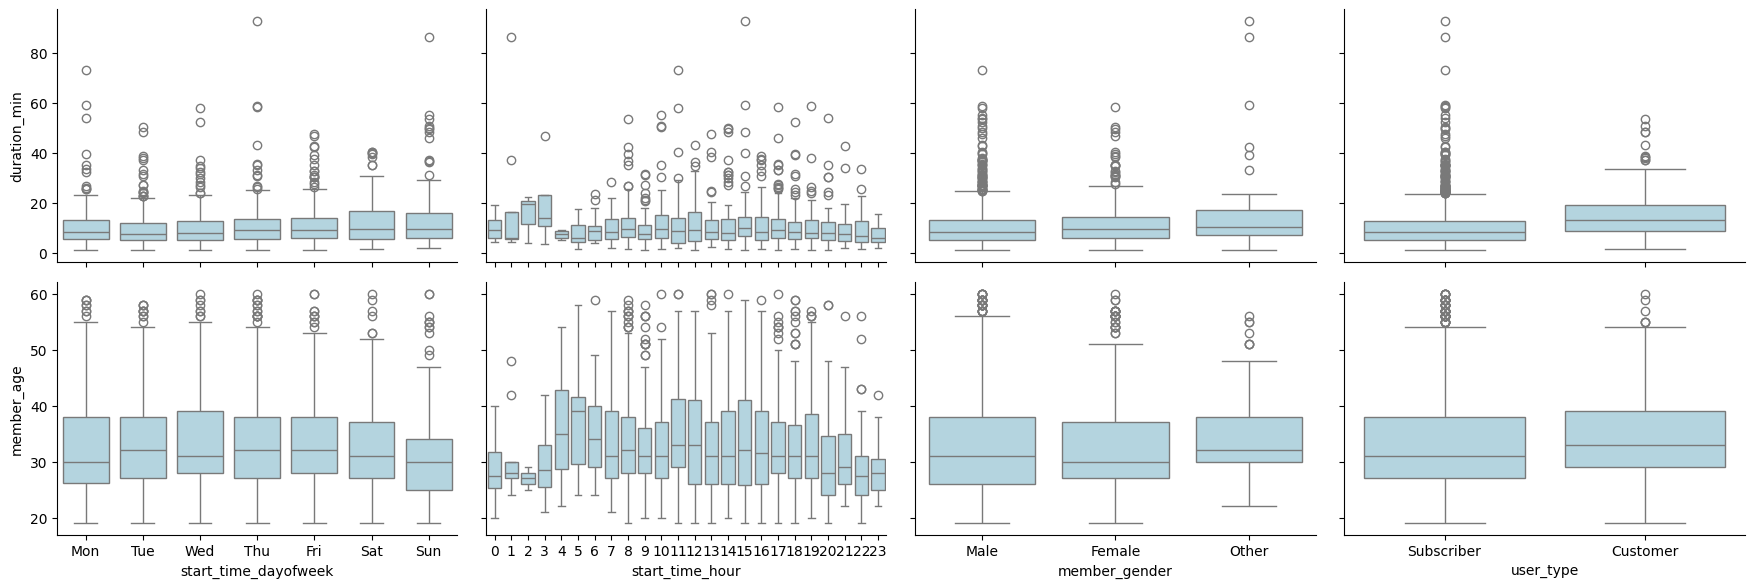

In [42]:
# Ensure you sample rows by position using .iloc and not by index.
samples = np.random.choice(df_clean.shape[0], 2000, replace=False)  # Generate random row indices by position
samp = df_clean.iloc[samples, :]  # Use iloc to select rows by position

def boxgrid(x, y, **kwargs):
    sb.boxplot(data=kwargs.get('data'), x=x, y=y, color='lightblue')

plt.figure(figsize=[15, 15])
g = sb.PairGrid(data=samp, y_vars=['duration_min', 'member_age'], x_vars=categoric_vars, height=3, aspect=1.5)
g.map(boxgrid)
plt.show()

**Insights:**
> * Longer bike rides are observed on weekends, especially on Sunday and Saturday.
> * Female cyclists tend to have longer rides compared to males.
> * Non-subscriber cyclists tend to have longer rides than subscribers.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Weekend vs Weekday Bike Ride Durations:

> * On weekends (Saturday and Sunday), bike rides tend to have longer durations compared to weekdays. This could indicate that people may have more leisure time during weekends, thus spending longer periods cycling.

2. Time of Day and Ride Duration:

> * Bike rides that start between 5:00 AM and 6:00 PM generally have the longest average durations. This suggests that cyclists starting during these times may be engaging in more extended or perhaps more relaxed rides.

3. Gender and Ride Duration:

> * Female cyclists typically have longer rides than male cyclists, on average. This could indicate differences in cycling habits or preferences between genders.

4. Customer vs Subscriber Type Cyclists:

> * Cyclists categorized as "customers" (i.e., not regular subscribers) tend to ride longer than those categorized as "subscribers." This might reflect that customers are likely more casual riders, perhaps taking longer trips compared to the more routine, shorter rides of subscribers.

5. Weekday Ride Durations vs Weekend:

> * More bike rides with durations close to the mean duration (around 10 minutes) happen on weekdays, while longer-duration rides are more common on weekends. This could suggest that weekday cycling is generally more task-oriented (e.g., commuting), while weekend rides may be for leisure or exercise.

6. Mean Duration Differences by Gender and Customer Type:

> * Again, female cyclists ride for longer periods compared to male cyclists, and customer-type cyclists also tend to have longer rides than subscriber-type cyclists, reinforcing earlier findings about the nature of these riders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. Age and Day of the Week:

> * Cyclists are typically older on Tuesdays and Wednesdays compared to other days of the week, with Sundays having the youngest riders on average. This could point to lifestyle or scheduling differences in cycling habits across the week.

2. Age and Time of Day:

> * Cyclists who start their rides between 6:00 AM and 7:00 AM tend to be older than those starting at other times. This might suggest that older cyclists prefer to ride earlier in the day, potentially for reasons like avoiding crowds or heat.

3. Gender and Age:

> * On average, male cyclists are older than female cyclists, which may reflect generational or cultural differences in cycling participation across genders.

4. Cycling Popularity by Time and Day:

> * Tuesdays see the highest number of cyclists at 5:00 PM, with a particularly high concentration of male cyclists during this time.
> * Female cyclists tend to ride most frequently at 8:00 AM and 5:00 PM, which could suggest preferred times for both work commutes and post-work activities.
> * Subscriber-type cyclists are notably most active at 5:00 PM, indicating that this might be a peak time for those who are regular riders.

5. Cycling Popularity by Day:

> * Tuesdays see the highest concentration of male cyclists, and this day also has the most female cyclists.
> * Saturday is a particularly busy day for customer-type cyclists, while Tuesday is the busiest for subscribers.

6. Gender and Cyclist Type:

> * Most cyclists, both in the subscriber and customer categories, are male. This trend might indicate that males are more likely to subscribe to bike services, or perhaps that cycling is more popular among men in this particular dataset.

## Multivariate Exploration

In this code, I'll demonstrate how to achieve a Facet Plot, Plot Matrix, and Scatterplot with multiple encodings. Each of these visualizations will address a multivariate exploration of the dataset based on the variables you've described.


**1.Facet Plot**: Faceted plots allow us to visualize the distribution of variables across categories. 

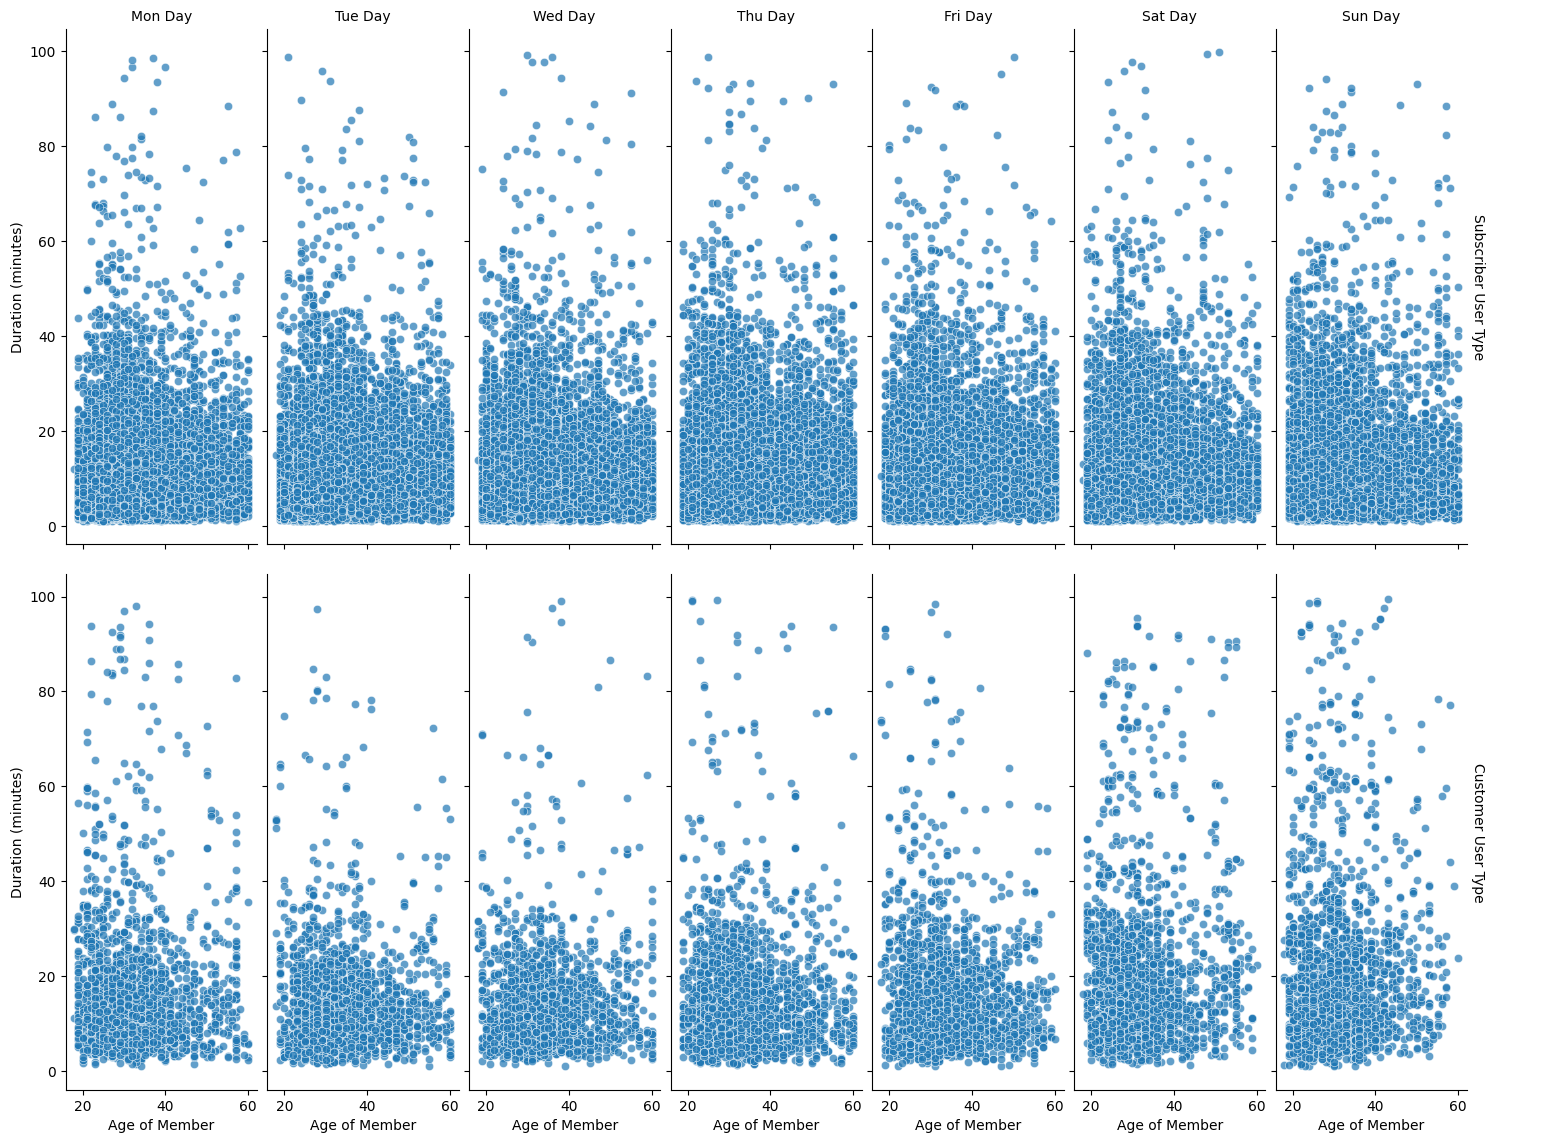

In [49]:
g = sb.FacetGrid(df_clean, col='start_time_dayofweek', row='user_type', height=4, margin_titles=True)
g.map(sb.scatterplot, 'member_age', 'duration_min', alpha=0.7)
g.fig.set_size_inches(15, 12) 
g.set_axis_labels('Age of Member', 'Duration (minutes)')
g.set_titles(col_template="{col_name} Day", row_template="{row_name} User Type")
g.add_legend()
plt.show()

**Observations for Facet Plot:**

> This plot splits the data into different panels by hour and user type. Each point represents a cyclist, showing how their age and cycling duration vary across the day and whether they are a subscriber or customer. The hue (color) distinguishes between genders.


**2. Plot Matrix**: A plot matrix (PairGrid or PairPlot) allows us to visualize relationships between multiple features at once.

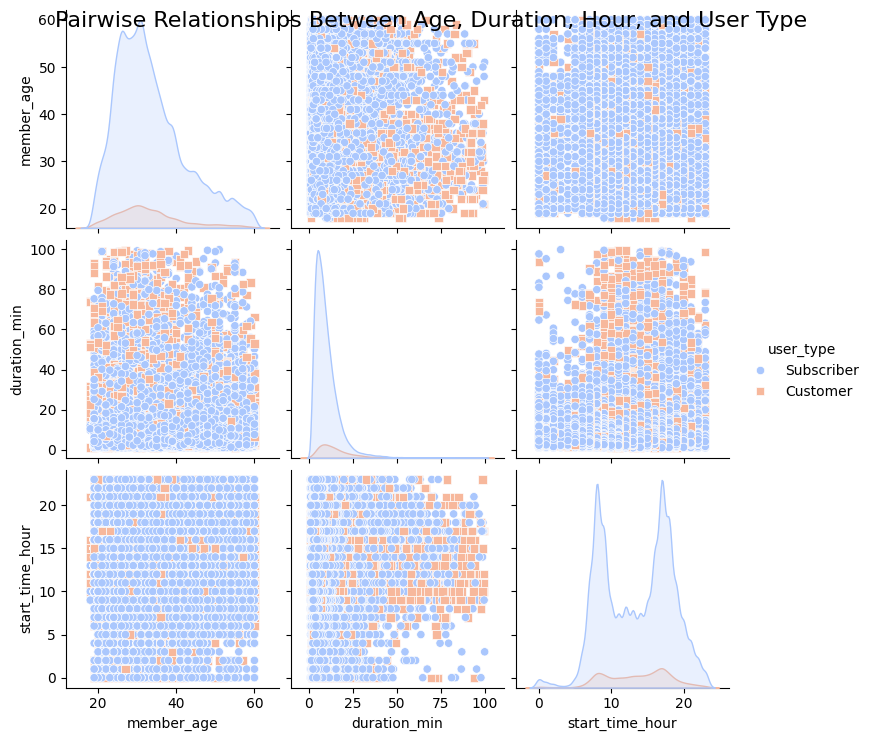

In [50]:
# Pair plot to visualize pairwise relationships between age, duration, and user type
sb.pairplot(df_clean[['member_age', 'duration_min', 'start_time_hour', 'user_type']], 
            hue='user_type', palette='coolwarm', markers=["o", "s"], height=2.5)
plt.suptitle('Pairwise Relationships Between Age, Duration, Hour, and User Type', size=16)
plt.show()


**Observations for Plot Matrix:**

> * The pair plot displays the relationships between multiple numerical variables (e.g., age, duration, hour) and the categorical user_type. The color palette differentiates between subscriber and customer users, showing how the patterns of duration and age relate to user type. This allows us to detect correlations visually.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * The features we investigated here are pretty much indenpendant from each other. We did not observed features that strengthened each other in terms of looking at features to my interest.

### Were there any interesting or surprising interactions between features?

> * Bike rides on Saturdays and Sundays have longer durations compared to bike rides on other weekdays.
> * There are the least cyclists at 4:00 AM while there are the most cyclists at 5:00 PM.
> * On average, female cyclists ride longer than male cyclists.
> * On average, customer type cyclists rike longer than subscriber type cyclists.
> * There are the least cyclists at 3:00 AM and 4:00 AM.
> * On average, there are less cyclists on Saturdays and on Sundays.
> * There are more younger cyclists (age < 40) across 7 days and 24 hours.